Exercise 6

4.1 Plot the potential of the harmonic oscillator
with some different values for the force constant k.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import builtins

In [8]:
# constants
kT = 0.15
k_B = 1
x_extrema = 100
x0 = 0 # positional displacement
x_min, x_max = -x_extrema, x_extrema  
x = np.linspace(x_min, x_max, 4000)  
spring_constants = [0.1, 1, 5]

Define functions, V and P

In [3]:
# Potential energy function, V(x)
def V(x, k, x0):
    return 0.5 * k * (x-x0)**2

# Probability distribution function, P(x)
def P(x, k, x0):
    # inplicitely set kT = whatever the global variable kT is
    return np.sqrt(k / (2 * np.pi * kT)) * np.exp(-0.5 * (k * (x-x0)**2) / (kT))  # prob density


Thermally average energy by direct integration:

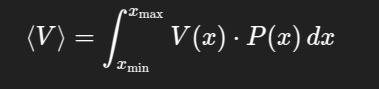

In [27]:
from scipy.integrate import quad

xmin = -5
xmax = 5
Z, _ = quad(P, xmin, xmax, args=(k, x0))

def P_norm(x, k, x0):          # normalized prob dist
    return P(x, k, x0) / Z

def integrand(x, k, x0):       # indmaden af integralet
    return V(x, k, x0) * P_norm(x, k, x0)

def direct_integration(k, x0, xmin, xmax):
    def integrand_local(x):
        return V(x, k, x0) * P(x, k, x0) / Z
    V_avg, _ = quad(integrand_local, xmin, xmax)
    return V_avg

k = 1
x0 = 0
V_avg, _ = quad(integrand, xmin, xmax, args=(k, x0))  
print(f"<V> = {V_avg:.3f}")
print(direct_integration(k,x0,xmin,xmax))

<V> = 2.124
2.1243538123228074


Plots, including thermally averaged potential energy by direct integration in a finite range from some x_min to x_max

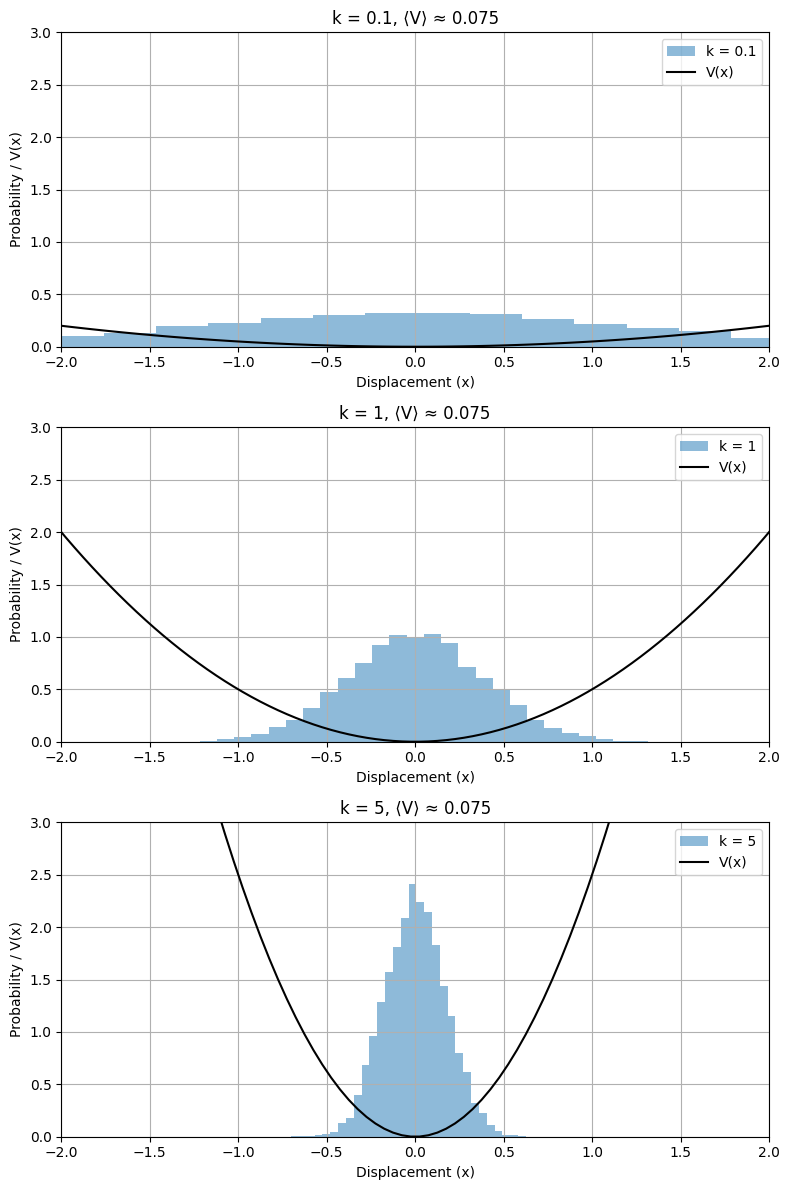

In [ ]:
fig, axs = plt.subplots(len(spring_constants), 1, figsize=(8, 12))

for i, k in enumerate(spring_constants):
    std_dev = np.sqrt(kT / k)
    samples = np.random.normal(loc=x0, scale=std_dev, size=10000)

    # Compute thermal average
    V_avg = direct_integration(k, x0, xmin, xmax)

    # Plot histogram
    axs[i].hist(samples, bins=30, density=True, alpha=0.5, label=f'k = {k}')
    axs[i].plot(x, V(x, k, x0), label='V(x)', color='black')

    axs[i].set_title(f'k = {k}, ⟨V⟩ ≈ {V_avg:.3f}')
    axs[i].set_xlabel('Displacement (x)')
    axs[i].set_ylabel('Probability / V(x)')
    axs[i].set_xlim(-2, 2)
    axs[i].set_ylim(0, 3)
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.savefig('classical_prob_dist_multiple_k.png')
plt.show()

Trying with different values of kT, i.e. different values of T. This shows that as the temperature increases, the system is able to access more states, i.e. it oscillates to higher displacements.

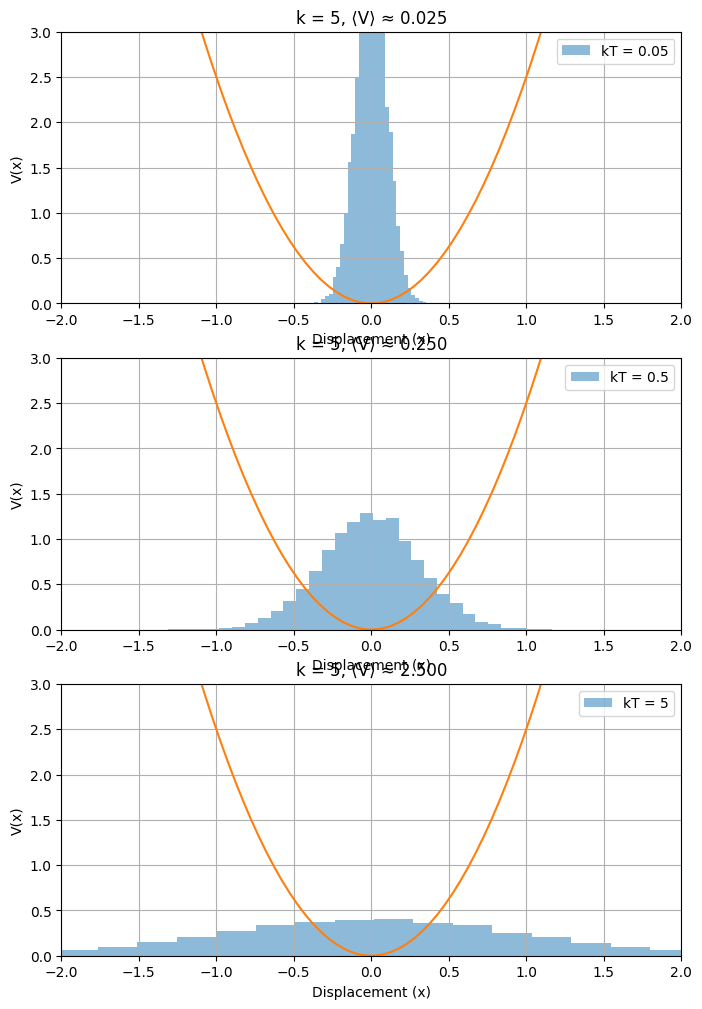

In [24]:
kTs = [0.05, 0.5, 5]

# plt.figure(figsize=(8, 6))
# for kT in kTs:
#     plt.plot(x, P(x, k, x0), label=f'kT = {kT}')

# plt.xlabel('Displacement (x)')
# plt.ylabel('Probability Density P(x)')
# plt.title('ProbDist for different T at spring constant k=1')
# plt.xlim((-5, 5))
# plt.grid(True)
# plt.legend()
# plt.savefig('classical_prob_dist_multiple_kT.png')
# plt.show()

fig, axs = plt.subplots(len(kTs), 1, figsize=(8, 12))

for i, kT in enumerate(kTs):
    std_dev = np.sqrt(kT / k)
    samples = np.random.normal(loc=x0, scale=std_dev, size=10000)  # Larger sample size for smooth histogram
    
    V_avg = direct_integration(k, x0, xmin, xmax)
    axs[i].set_title(f'k = {k}, ⟨V⟩ ≈ {V_avg:.3f}')
    axs[i].hist(samples, bins=30, density=True, alpha=0.5, label=f'kT = {kT}')
    axs[i].plot(x,V(x,k,x0))
    axs[i].set_xlabel('Displacement (x)')
    axs[i].set_ylabel('V(x)')
    axs[i].set_xlim(-2,2)
    axs[i].set_ylim(0,3)
    axs[i].grid(True)
    axs[i].legend()

plt.savefig('classical_prob_dist_multiple_kT.png')
plt.show()


4.2 Direct Monte Carlo sampling
Evaluate the thermally avg pot energy by MC sampling.
Use a constant probability dist in a finite range as a known dist.

In [761]:
def direct_sampling(k,x_min,x_max,N=100000):
    xs = np.linspace(x_min, x_max, N)
    envelope = lambda x: np.exp(-0.5*k*(x-x0)**2/kT)
    sample = [x for x in xs if np.random.rand() < envelope(x)]
    print('sample size:', len(sample))
    rejection_rate = 1 - len(sample) / len(xs)
    print(f"Rejection Rate: {rejection_rate:.2%}")
    return np.array(sample)

In [762]:
def estimate_thermal_avg_V(accepted_samples, k):
    V_values = V(accepted_samples, k, x0)
    return np.mean(V_values)

In [763]:
num_samples = 1000000
k = 1
samples = direct_sampling(k,x_min,x_max,num_samples)
thermal_avg_V = estimate_thermal_avg_V(samples,k)
print(f"Estimated thermally avg pot energy: {thermal_avg_V} J")

sample size: 6880
Rejection Rate: 99.31%
Estimated thermally avg pot energy: 0.1505619516063108 J


4.3 Heat cap of one harmonic osc by eval the thermally avg pot energy at some different temps and then taking the deriv numerically.

In [764]:
num_samples = 100000
samples = direct_sampling(k,x_min,x_max,num_samples)
thermal_avg_V = estimate_thermal_avg_V(samples,k)

sample size: 716
Rejection Rate: 99.28%


In [765]:
def estimate_thermal_avg_V_sqrd(accepted_samples, k):
    V_values_sqrd = V(accepted_samples, k, x0)**2
    return np.mean(V_values_sqrd)

4.4 Fluctuations: Evaluate the heat cap from fluctuations in the potential energy.

Exercise 7

5.1 Two oscillators
a) consider two classical harmonic oscillators with k=1, x0=0 and k=10, x0=1, respectively. Plot the potentials.

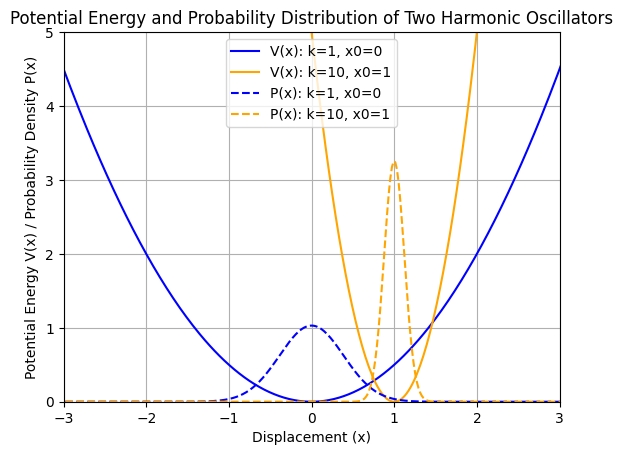

In [766]:
k_1 = 1
x0_1 = 0
k_2 = 10
x0_2 = 1
kT = 0.15

x_extrema = 4
x_min, x_max = -x_extrema, x_extrema  
x = np.linspace(x_min, x_max, 400)  # Generate 400 points from x_min to x_max

V1 = V(x, k_1, x0_1)
V2 = V(x, k_2, x0_2)

P1 = P(x, k_1, x0_1)
P2 = P(x, k_2, x0_2)

# Plot potential energy functions
plt.plot(x, V1, label=f'V(x): k={k_1}, x0={x0_1}', color='blue')
plt.plot(x, V2, label=f'V(x): k={k_2}, x0={x0_2}', color='orange')

# Plot probability distribution functions on the same graph
plt.plot(x, P1, label=f'P(x): k={k_1}, x0={x0_1}', color='blue', linestyle='dashed')
plt.plot(x, P2, label=f'P(x): k={k_2}, x0={x0_2}', color='orange', linestyle='dashed')

plt.xlabel('Displacement (x)')
plt.ylabel('Potential Energy V(x) / Probability Density P(x)')
plt.title('Potential Energy and Probability Distribution of Two Harmonic Oscillators')
plt.xlim(-3, 3)
plt.ylim(0, 5)
plt.grid(True)
plt.legend()
plt.savefig('harmonic_oscillators_with_prob.png')
plt.show()

b) Oscillators are in contact with heat bath with kT = 0.15 I think this is already the case for the above :)   
Evaluate the thermal avg potential energy for th both oscillators using direct MC sampling.

In [767]:
minmax = 1
samples = direct_sampling(k,-minmax,minmax,num_samples)
thermal_avg_V = estimate_thermal_avg_V(samples,k)
print(f"Estimated thermally avg pot energy: {thermal_avg_V} J")

sample size: 48041
Rejection Rate: 51.96%
Estimated thermally avg pot energy: 0.0693755409372579 J


5.2 Non-Boltzmann sampling

Exercise 8: Metropolis Monte Carlo

6.1 Metropolis Monte Carlo sampling: Establishing the sample {x_i} using Metropolis MC sampling. Dealing with one HO with k=1 and k_B*T=1.

In [806]:
# setting up for Metropolis MC sampling
import numpy as np
import matplotlib.pyplot as plt
import builtins

k = 1  # spring const
kT = 0.15  

x_min = -3
x_max = 3
x_points = 400

bin_number = 50

# Boltzmann distribution function based on the harmonic potential
def V(x, k, x0):
    return 0.5 * k * (x - x0)**2

def P(x, k, x0):
    return np.exp(-V(x, k, x0) / kT)

# Metropolis sampling function
def metropolis_sampling(x0, N, Delta):
    samples = []
    current_x = x0
    for _ in builtins.range(N):
        # Propose new x' using random walk: x' = x + delta * N(0,1)
        RNDn = np.random.randn() #random distribution "randn"
        proposed_x = current_x + Delta * RNDn

        # Acceptance probability (min(1, P(x') / P(x)))
        acceptance_prob = min(1, P(proposed_x, k, x0) / P(current_x, k, x0))

        # Accept or reject the new position
        if np.random.rand() < acceptance_prob:
            current_x = proposed_x  # Accept the move

        # Store the current position
        samples.append(current_x)

    return np.array(samples)


6.2 Random walk transitions I: vary N

C:\Users\jacob\AppData\Local\Temp\ipykernel_1804\50245187.py:14: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  axes[i].plot(xs, P(xs, k, x0) / np.trapz(P(xs, k, x0), xs), label="Boltzmann distribution", color="blue")


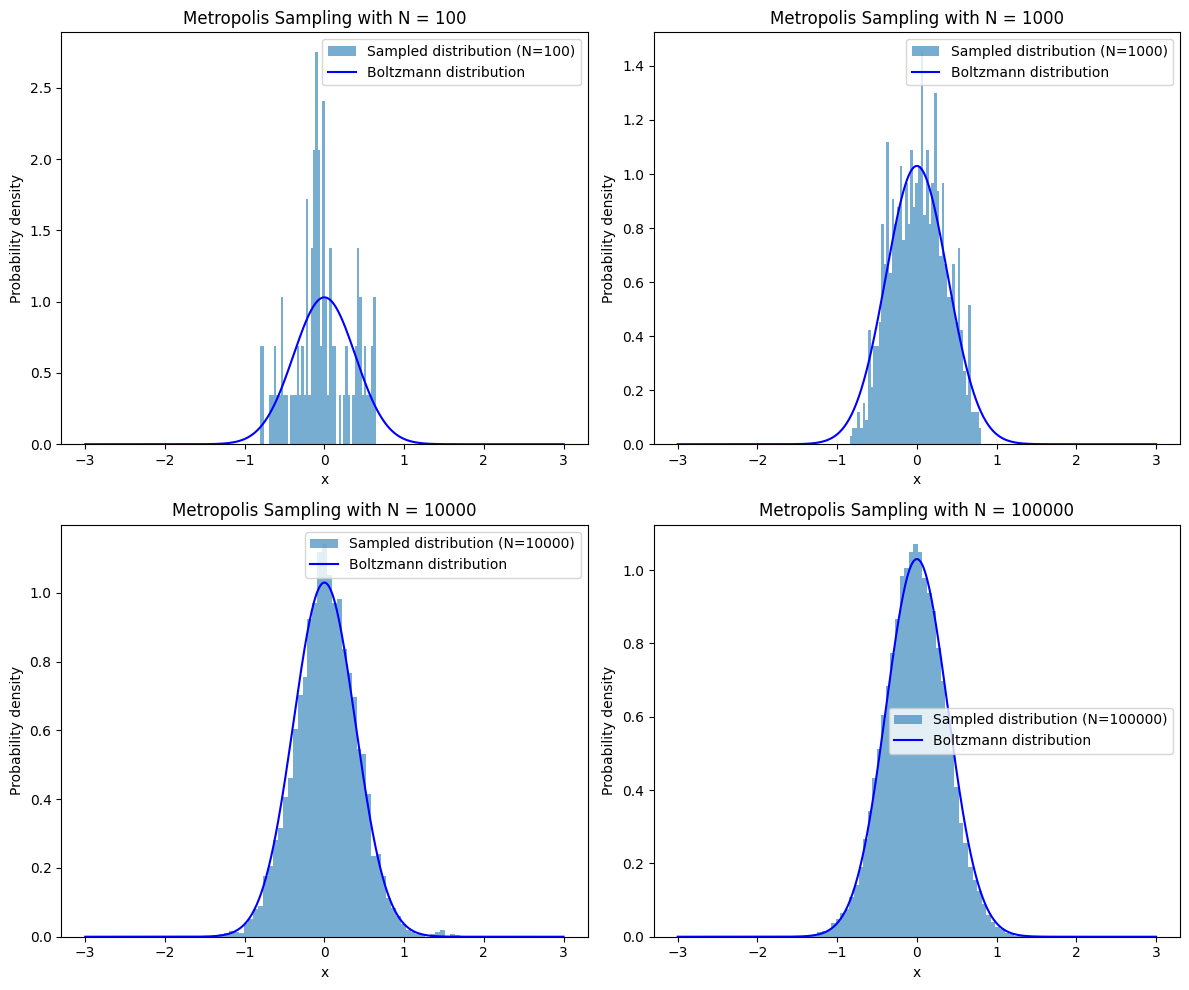

In [807]:
# Initial position
x0 = 0.0
N_values = [100, 1000, 10000, 100000]
Delta = 0.1

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) #this is the right way to do it!
axes = axes.flatten()
xs = np.linspace(x_min, x_max, x_points)

# Loop over each N value, plot the results in corresponding subplot
for i, N in enumerate(N_values):
    samples = metropolis_sampling(x0, N, Delta)
    axes[i].hist(samples, bins=bin_number, density=True, label=f"Sampled distribution (N={N})", alpha=0.6)
    axes[i].plot(xs, P(xs, k, x0) / np.trapz(P(xs, k, x0), xs), label="Boltzmann distribution", color="blue")

    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Probability density')
    axes[i].set_title(f'Metropolis Sampling with N = {N}')
    axes[i].legend()

plt.tight_layout()
plt.show()


6.3 Random walk transitions II: vary Delta

C:\Users\jacob\AppData\Local\Temp\ipykernel_1804\905917685.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  axes[i].plot(xs, P(xs, k, x0) / np.trapz(P(xs, k, x0), xs), label="Boltzmann distribution", color="blue")


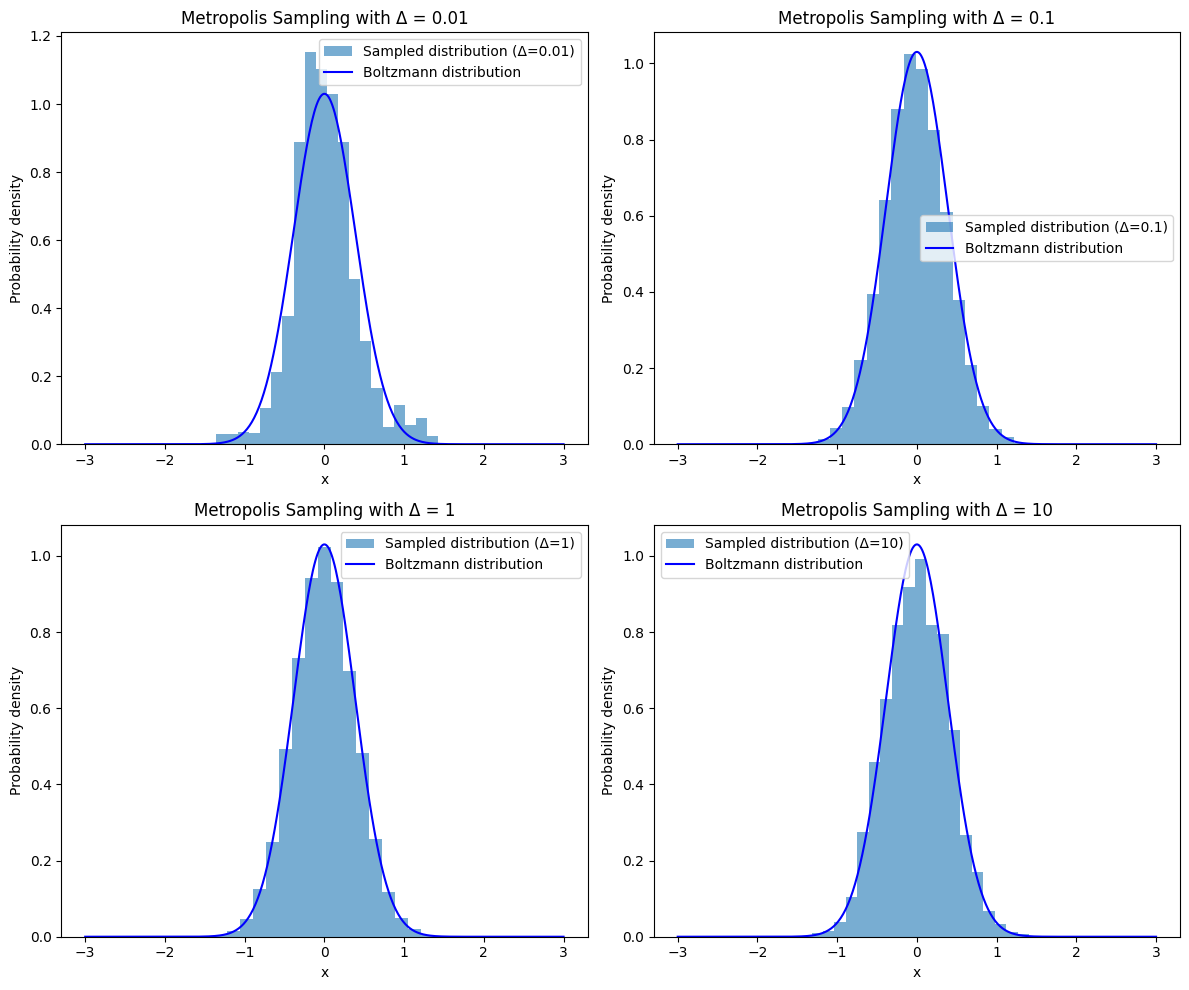

In [801]:
# Initial position
x0 = 0.0
N = 100000

Delta_values = [0.01, 0.1, 1, 10]

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) #this is the right way to do it!
axes = axes.flatten()
xs = np.linspace(x_min, x_max, x_points)

# Loop over each Delta value, plot the results in the corresponding subplot
for i, Delta in enumerate(Delta_values):
    samples = metropolis_sampling(x0, N, Delta)
    axes[i].hist(samples, bins=20, density=True, label=f"Sampled distribution (Δ={Delta})", alpha=0.6)
    axes[i].plot(xs, P(xs, k, x0) / np.trapz(P(xs, k, x0), xs), label="Boltzmann distribution", color="blue")

    # Set labels and title for each subplot
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Probability density')
    axes[i].set_title(f'Metropolis Sampling with Δ = {Delta}')
    axes[i].legend()

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()


6.4 Uniform transitions

C:\Users\jacob\AppData\Local\Temp\ipykernel_1804\506876986.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  axes[i].plot(xs, P(xs, k, x0) / np.trapz(P(xs, k, x0), xs), label="Boltzmann distribution", color="blue")


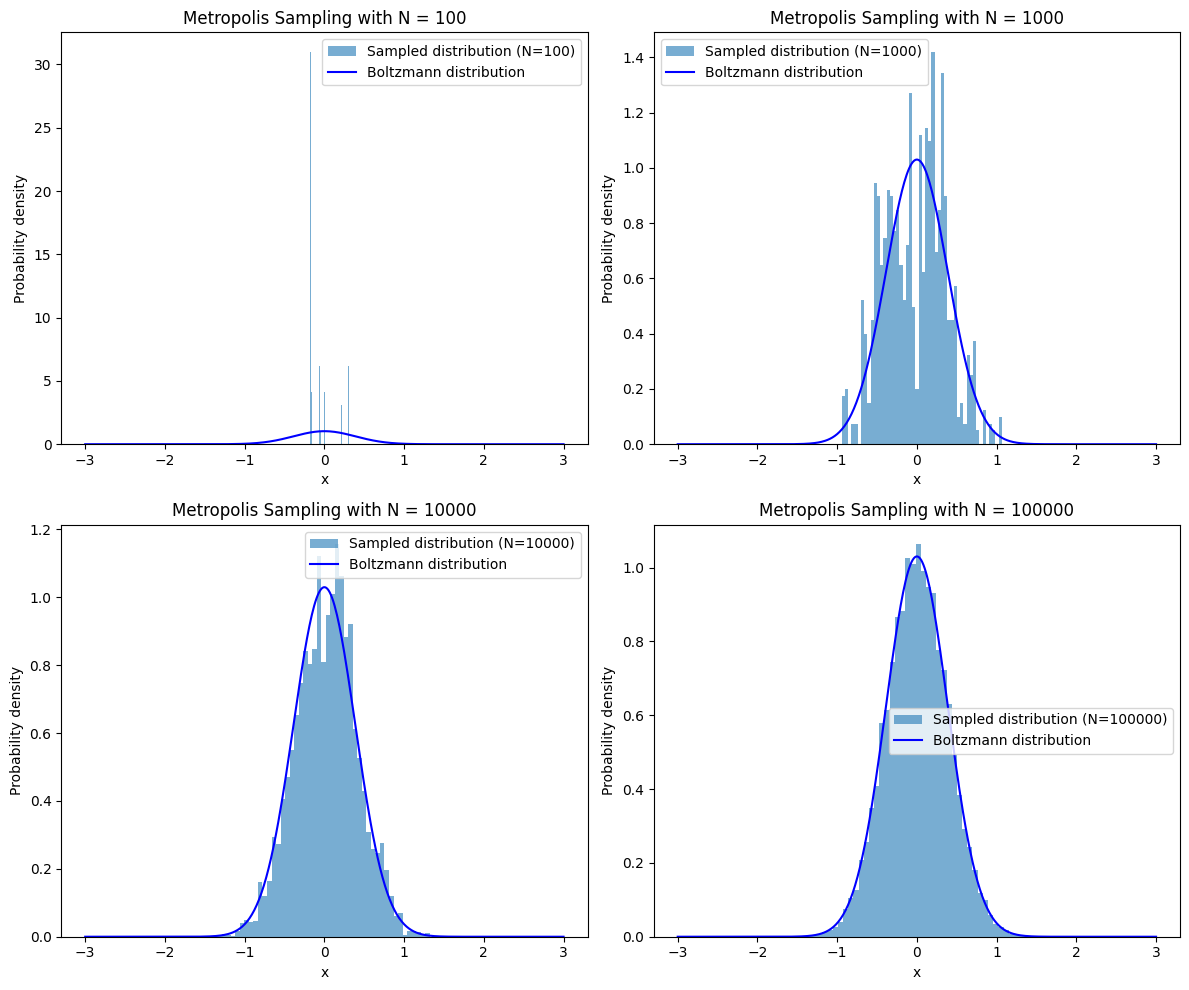

In [802]:
# Metropolis sampling function
def metropolis_sampling_alt(x0, N, Delta):
    samples = []
    current_x = x0
    for _ in builtins.range(N):
        # Propose new x' using random walk: x' = x + Delta * N(0,1)
        RND = np.random.rand() #uniformly distributed number 0-1
        proposed_x = (x_max-x_min) * RND + x_min

        # Acceptance probability (min(1, P(x') / P(x)))
        acceptance_prob = min(1, P(proposed_x, k, x0) / P(current_x, k, x0))

        # Accept or reject the new position
        if np.random.rand() < acceptance_prob:
            current_x = proposed_x  # Accept the move

        # Store the current position
        samples.append(current_x)

    return np.array(samples)

# Initial position
x0 = 0.0
N_values = [100, 1000, 10000, 100000]
Delta = 0.1

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) #this is the right way to do it!
axes = axes.flatten()
xs = np.linspace(x_min, x_max, x_points)

# Loop over each Delta value, plot the results in the corresponding subplot
for i, N in enumerate(N_values):
    samples = metropolis_sampling_alt(x0, N, Delta)
    axes[i].hist(samples, bins=bin_number, density=True, label=f"Sampled distribution (N={N})", alpha=0.6)
    axes[i].plot(xs, P(xs, k, x0) / np.trapz(P(xs, k, x0), xs), label="Boltzmann distribution", color="blue")

    # Set labels and title for each subplot
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Probability density')
    axes[i].set_title(f'Metropolis Sampling with N = {N}')
    axes[i].legend()

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()


Exercise 9

7.1 Metropolis Monte Carlo sampling: In this exercise we continue making the sample, {x_i}, using the Metropolis Monte Carlo sampling scheme. However, this time you should invent your own one-dimensional potential. I have made one from two downward-pointing Gaussians. But, please make your own personal choice. (I choose LJ pot).

7.2 Random walker transitions I:
Metropolis MC using Lennard-Jones potential

<function matplotlib.pyplot.show(close=None, block=None)>

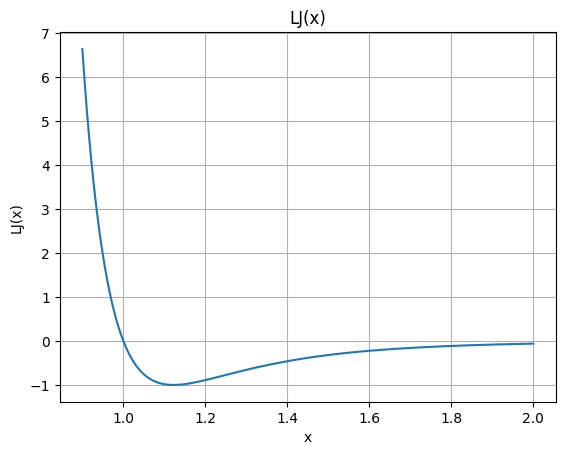

In [820]:
#plot LJ_pot
def LJ_pot(r, epsilon=1.0, sigma=1.0):
    """
    Lennard-Jones potential function V(r) = 4*epsilon * [(sigma/r)^12 - (sigma/r)^6]
    :param r: Distance between particles
    :param epsilon: Depth of well
    :param sigma: Distance where pot=0
    :return: Potential energy at distance r
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

xs = np.linspace (0.9,2,1000)
y = LJ_pot(xs)

plt.plot(xs,y, label='LJ(x)')
plt.title('LJ(x)')
plt.xlabel('x')
plt.ylabel('LJ(x)')
plt.legend
plt.grid(True)
plt.show

In [826]:
# Metropolis sampling function for LJ potential
def metropolis_sampling(x0, N, Delta):
    samples = []
    current_x = x0
    for _ in builtins.range(N):
        # Propose new x' using random walk: x' = x + delta * N(0,1)
        RNDn = np.random.randn()  # Random distribution "randn"
        proposed_x = current_x + Delta * RNDn

        # Calculate potential energy at current and proposed positions
        current_pot = LJ_pot(current_x)
        proposed_pot = LJ_pot(proposed_x)

        # Acceptance probability (min(1, exp(-(V(x') - V(x)) / kT)))
        delta_E = proposed_pot - current_pot
        acceptance_prob = min(1, np.exp(-delta_E / kT))

        # Accept or reject the new position
        if np.random.rand() < acceptance_prob:
            current_x = proposed_x  # Accept the move

        # Store the current position
        samples.append(current_x)

    return np.array(samples)

C:\Users\jacob\AppData\Local\Temp\ipykernel_1804\12651790.py:16: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  axes[i].plot(xs, LJ_pot(xs) / -np.trapz(LJ_pot(xs), xs), label="Lennard-Jones", color="red")


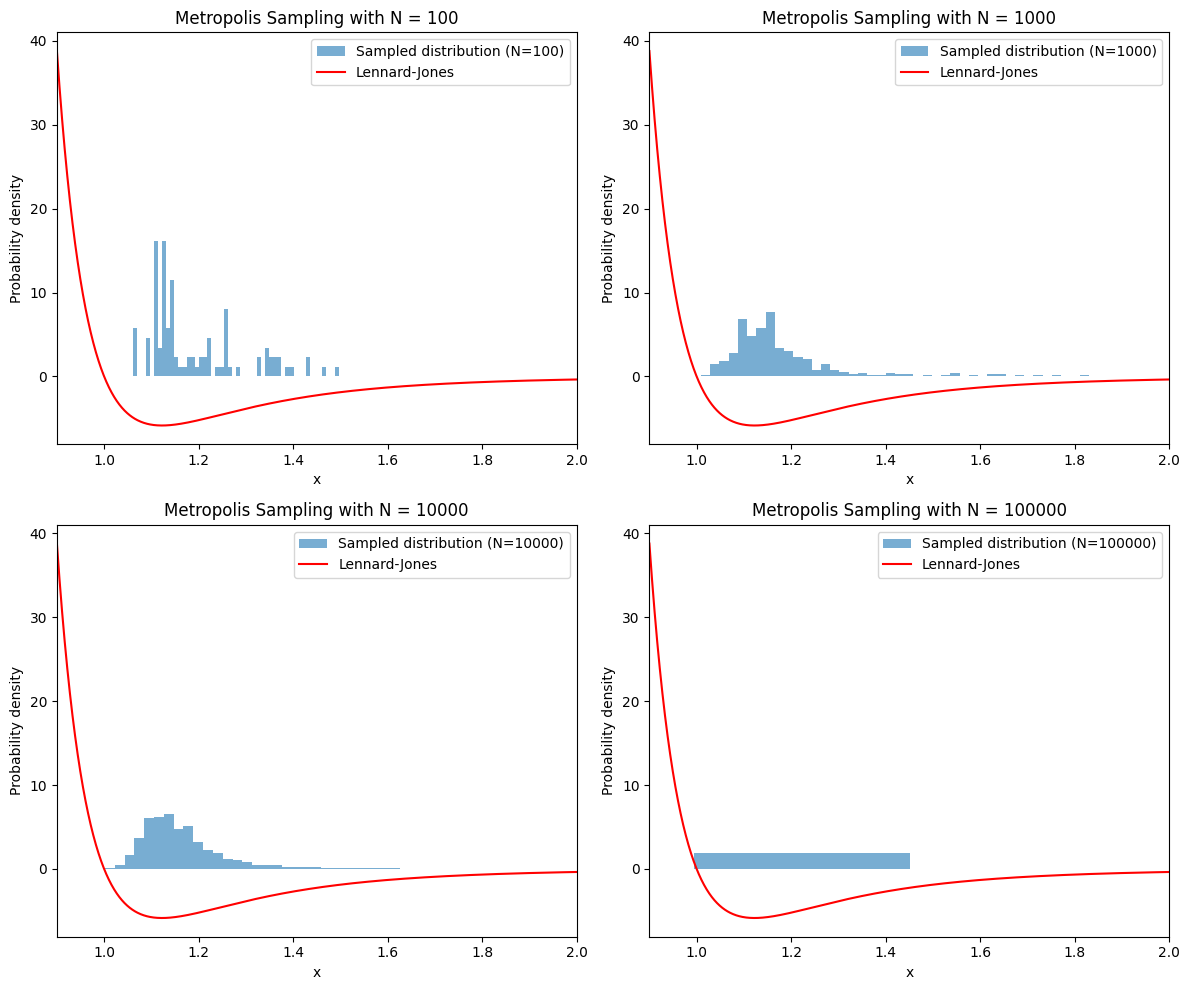

In [840]:
# Initial position
x_min = 0.9
x_max = 2.0
x0 = (x_max+x_min)/2
N_values = [100, 1000, 10000, 100000]
Delta = 0.1

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) #this is the right way to do it!
axes = axes.flatten()
xs = np.linspace(x_min, x_max, 1000)

# Loop over each Delta value, plot the results in the corresponding subplot
for i, N in enumerate(N_values):
    samples = metropolis_sampling(x0, N, Delta)
    axes[i].hist(samples, bins=bin_number, density=True, label=f"Sampled distribution (N={N})", alpha=0.6)
    axes[i].plot(xs, LJ_pot(xs) / -np.trapz(LJ_pot(xs), xs), label="Lennard-Jones", color="red")

    # Set labels and title for each subplot
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Probability density')
    axes[i].set_title(f'Metropolis Sampling with N = {N}')
    axes[i].set_xlim(0.9,2.0)
    axes[i].legend()

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()


7.3 Random walk transitions II: smaller \Delta

C:\Users\jacob\AppData\Local\Temp\ipykernel_1804\4086754641.py:16: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  axes[i].plot(xs, LJ_pot(xs) / -np.trapz(LJ_pot(xs), xs), label="Lennard-Jones", color="red")


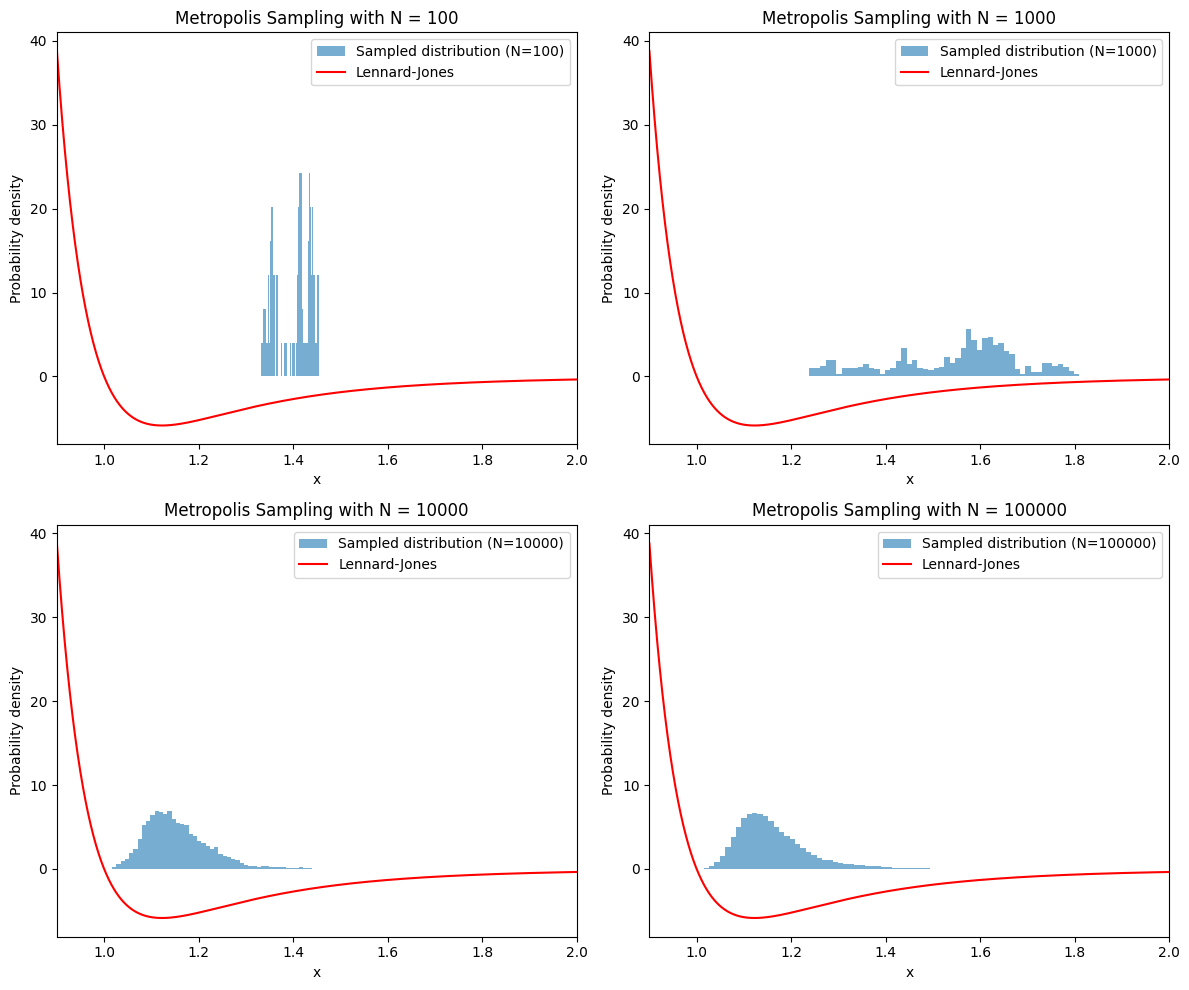

In [839]:
# Initial position
x_min = 0.9
x_max = 2.0
x0 = (x_max+x_min)/2
N_values = [100, 1000, 10000, 100000]
Delta = 0.01

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) #this is the right way to do it!
axes = axes.flatten()
xs = np.linspace(x_min, x_max, 1000)

# Loop over each Delta value, plot the results in the corresponding subplot
for i, N in enumerate(N_values):
    samples = metropolis_sampling(x0, N, Delta)
    axes[i].hist(samples, bins=bin_number, density=True, label=f"Sampled distribution (N={N})", alpha=0.6)
    axes[i].plot(xs, LJ_pot(xs) / -np.trapz(LJ_pot(xs), xs), label="Lennard-Jones", color="red")

    # Set labels and title for each subplot
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Probability density')
    axes[i].set_title(f'Metropolis Sampling with N = {N}')
    axes[i].set_xlim(0.9,2.0)
    axes[i].legend()

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()


7.4 Uniform transitions: LJ pot

C:\Users\jacob\AppData\Local\Temp\ipykernel_1804\2574095780.py:40: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  axes[i].plot(xs, LJ_pot(xs) / -np.trapz(LJ_pot(xs), xs), label="Lennard-Jones", color="red")


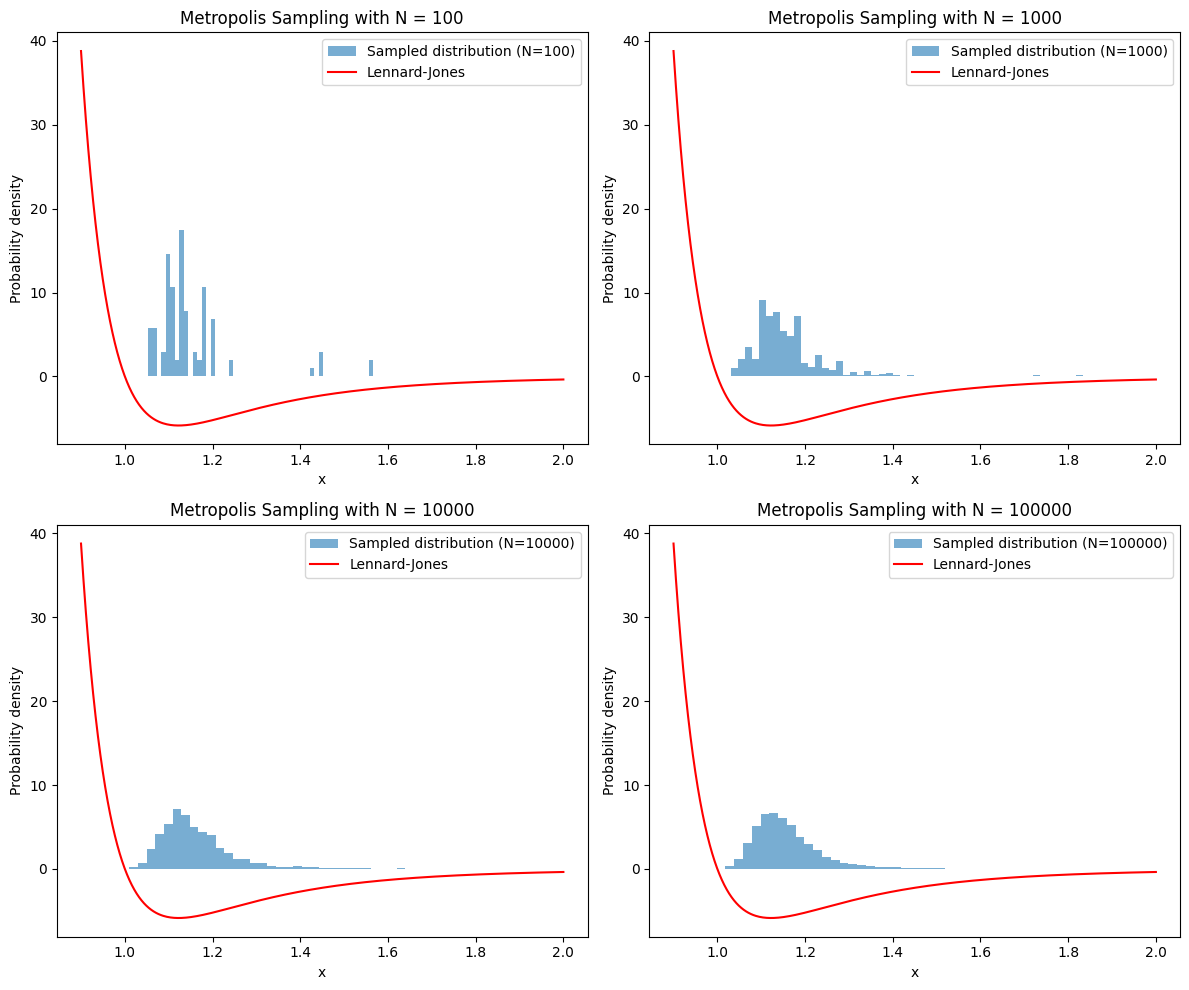

In [844]:
# Uniform Metropolis sampling function for LJ potential
def metropolis_sampling_alt(x0, N, Delta):
    samples = []
    current_x = x0
    for _ in builtins.range(N):
        # Propose new x' using random walk: x' = x + delta * N(0,1)
        RND = np.random.rand()  # Random distribution "randn"
        proposed_x = (x_max-x_min) * RND + x_min

        # Calculate potential energy at current and proposed positions
        current_pot = LJ_pot(current_x)
        proposed_pot = LJ_pot(proposed_x)

        # Acceptance probability (min(1, exp(-(V(x') - V(x)) / kT)))
        delta_E = proposed_pot - current_pot
        acceptance_prob = min(1, np.exp(-delta_E / kT))

        # Accept or reject the new position
        if np.random.rand() < acceptance_prob:
            current_x = proposed_x  # Accept the move

        # Store the current position
        samples.append(current_x)

    return np.array(samples)


# Initial position
N_values = [100, 1000, 10000, 100000]
Delta = 0.01

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) #this is the right way to do it!
axes = axes.flatten()
xs = np.linspace(x_min, x_max, x_points)

# Loop over each Delta value, plot the results in the corresponding subplot
for i, N in enumerate(N_values):
    samples = metropolis_sampling_alt(x0, N, Delta)
    axes[i].hist(samples, bins=bin_number, density=True, label=f"Sampled distribution (N={N})", alpha=0.6)
    axes[i].plot(xs, LJ_pot(xs) / -np.trapz(LJ_pot(xs), xs), label="Lennard-Jones", color="red")

    # Set labels and title for each subplot
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Probability density')
    axes[i].set_title(f'Metropolis Sampling with N = {N}')
    axes[i].legend()

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()
